In [51]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetry2V1')

In [4]:
print(ds)

<xarray.Dataset>
Dimensions:     (gridX: 398, gridY: 898)
Coordinates:
  * gridY       (gridY) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * gridX       (gridX) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
Data variables:
    longitude   (gridY, gridX) float32 ...
    latitude    (gridY, gridX) float32 ...
    bathymetry  (gridY, gridX) float64 ...
Attributes:
    acknowledgement: MEOPAR, ONC, Compute Canada
    cdm_data_type: Grid
    comment: Bathymetry, Latitudes and Longitudes
    Conventions: CF-1.6, COARDS, ACDD-1.3
    coverage_content_type: modelResult
    creator_email: sallen@eos.ubc.ca
    creator_name: Salish Sea MEOPAR Project Contributors
    creator_url: https://salishsea-meopar-docs.readthedocs.org/
    drawLandMask: over
    history: [2016-02-05 16:35:19] Created dataset.
[2016-03-02 18:08:56] Changed all variables to zlib=True.
[2016-03-02 18:08:56] Added least_significant_digit=1 and fill_value=0 to bathymetry variable.
[2016-03-03 12:28:37

In [15]:
print(ds.dims)
print(ds.dims['gridY'])

Frozen(SortedKeysDict({'gridX': 398, 'gridY': 898}))
898


In [16]:
ds.data_vars

Data variables:
    longitude   (gridY, gridX) float32 ...
    latitude    (gridY, gridX) float32 ...
    bathymetry  (gridY, gridX) float64 ...

In [17]:
ds.coords

Coordinates:
  * gridY    (gridY) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * gridX    (gridX) int16 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

In [18]:
ds.attrs

OrderedDict([('acknowledgement', 'MEOPAR, ONC, Compute Canada'),
             ('cdm_data_type', 'Grid'),
             ('comment', 'Bathymetry, Latitudes and Longitudes'),
             ('Conventions', 'CF-1.6, COARDS, ACDD-1.3'),
             ('coverage_content_type', 'modelResult'),
             ('creator_email', 'sallen@eos.ubc.ca'),
             ('creator_name', 'Salish Sea MEOPAR Project Contributors'),
             ('creator_url', 'https://salishsea-meopar-docs.readthedocs.org/'),
             ('drawLandMask', 'over'),
             ('history',
              '[2016-02-05 16:35:19] Created dataset.\n[2016-03-02 18:08:56] Changed all variables to zlib=True.\n[2016-03-02 18:08:56] Added least_significant_digit=1 and fill_value=0 to bathymetry variable.\n[2016-03-03 12:28:37] Added valid_range attribute to all variables.\n2016-05-09T23:29:19Z (local files)\n2016-05-09T23:29:19Z https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetry2V1.das'),
             ('infoUrl',
              

In [56]:
print(ds.bathymetry.values)
(np.logical_not(np.isnan(ds.bathymetry.values))).sum()/ds.bathymetry.values.size # percentage of area that is water (by area)


[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


0.21566350684379582

In [46]:
# Subset for values that are not NaN (loses dimensionality though)
(ds.bathymetry.values[np.logical_not(np.isnan(ds.bathymetry.values))]) 

array([   4.    ,    5.375 ,    8.375 , ...,  133.1875,    8.25  ,    7.625 ])

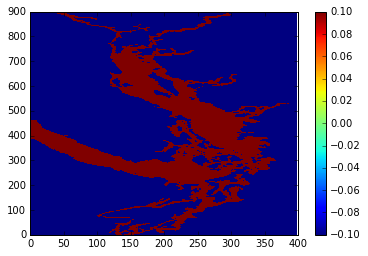

In [55]:
fig, ax = plt.subplots(1, 1)
mesh = ax.pcolormesh(ds.bathymetry.values)
fig.colorbar(mesh)